In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In [3]:
from classes.photon_ensemble import photon_ensemble, create_doms 

In [82]:
mpl.rcParams["xtick.labelsize"] = 15
mpl.rcParams["ytick.labelsize"] = 15
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["legend.fontsize"] = 15

In [83]:
# mpl.rcParams.keys()

In [41]:
Nphotons = 10000
dt = 1.0
tInit = 0.0
PA = 0.01
PS = 0.02
pInit = np.array([0.0, 0.0])
dInit = "random" #0.0


xlim = [-40, 40]
ylim = [-40, 40]
dx = 20
dy = 20
r = 2

DOMs = create_doms(xlim, ylim, dx, dy, r)

params = dict(Nphotons=Nphotons, dt=dt, PA=PA, PS=PS, initial_position=pInit, initial_direction=dInit,
              DOMs=DOMs, time=tInit)

sim = photon_ensemble(**params)

tstart = time.time()
sim.simulate()
tend = time.time()

print "Simulation took %s seconds" %  (tend-tstart)

Simulation took 4.16264200211 seconds


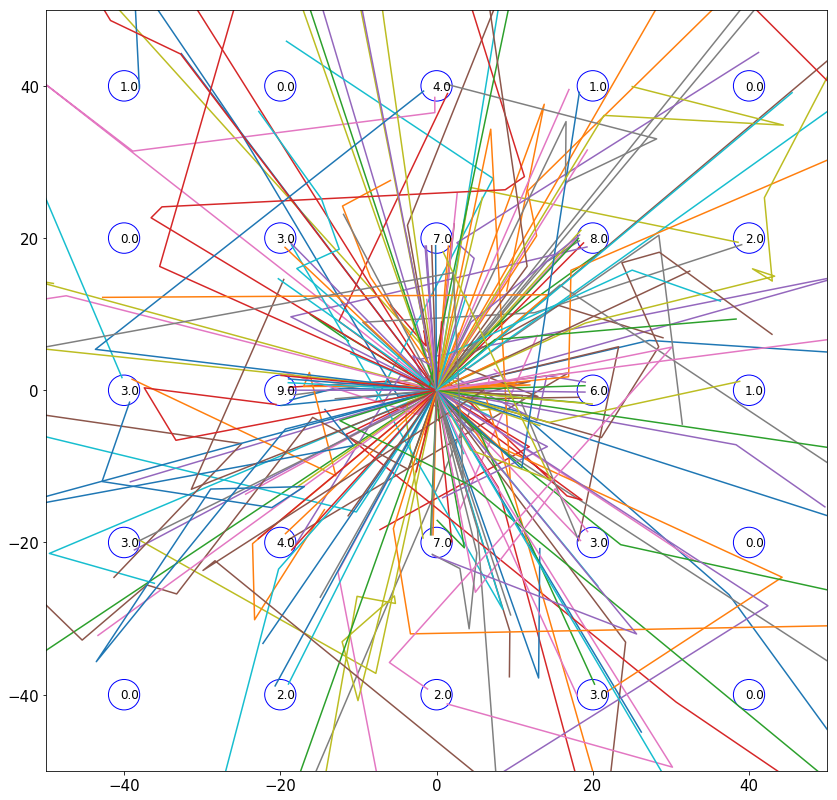

In [40]:
grid = [[-50, 50],
        [-50, 50]]
sim.plot_photons(grid=grid)
# sim.plot_cascade(center_doms=True)

In [36]:
xlim = [-40, 40]
ylim = [-40, 40]
dx = 20
dy = 20
r = 2

DOMs = create_doms(xlim, ylim, dx, dy, r)
params["DOMs"] = DOMs

In [37]:
times = []
Ns = []

NphotonTrials = [5, 10, 50, 100, 500, 1000, 2000, 5000, 10000, 20000]

for Nphotons in NphotonTrials:
    print Nphotons
    tstart = time.time()
    params["Nphotons"] = Nphotons
    sim = photon_ensemble(**params)
    sim.simulate()
    tend = time.time()

    times.append(tend-tstart)
    Ns.append(Nphotons)

5
10
50
100
500
1000
2000
5000
10000
20000


Text(0,0.5,'Time [s]')

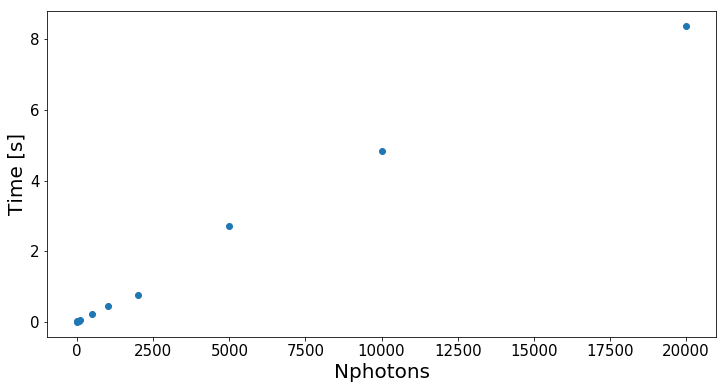

In [38]:
plt.figure(figsize=(12,6))
plt.scatter(Ns, times)

plt.xlabel("Nphotons")
plt.ylabel("Time [s]")
# plt.xscale("log")
# plt.yscale("log")

In [78]:
Nphotons = 200
dt = 1.0
tInit = 0.0
PA = 0.01
PS = 0.05
pInit = [0.0, 0.0]
dInit = "random" #0.0


xlim = [-40, 40]
ylim = [-40, 40]
dx = 40
dy = 40
r = 2

DOMs = create_doms(xlim, ylim, dx, dy, r)

params = dict(dt=dt, PA=PA, PS=PS, initial_position=pInit, initial_direction=dInit,
              DOMs=DOMs, time=tInit, verbose=False)

dom_hits = []
times = []
for i in range(1000):
    if i%50 == 0:
        print i
    # Start time
    tstart = time.time()
    # Simulate
    sim = photon_ensemble(Nphotons, **params)
    sim.simulate()
    hits = sim.dom_hits
    dom_hits.append(hits)
    # End time
    tend = time.time()
    times.append(tend-tstart)

dom_hits = np.array(dom_hits)
times = np.array(times)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [55]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial

In [51]:
def poisson(k, l):
    return (np.exp(-l)*(l**k)) / factorial(k)

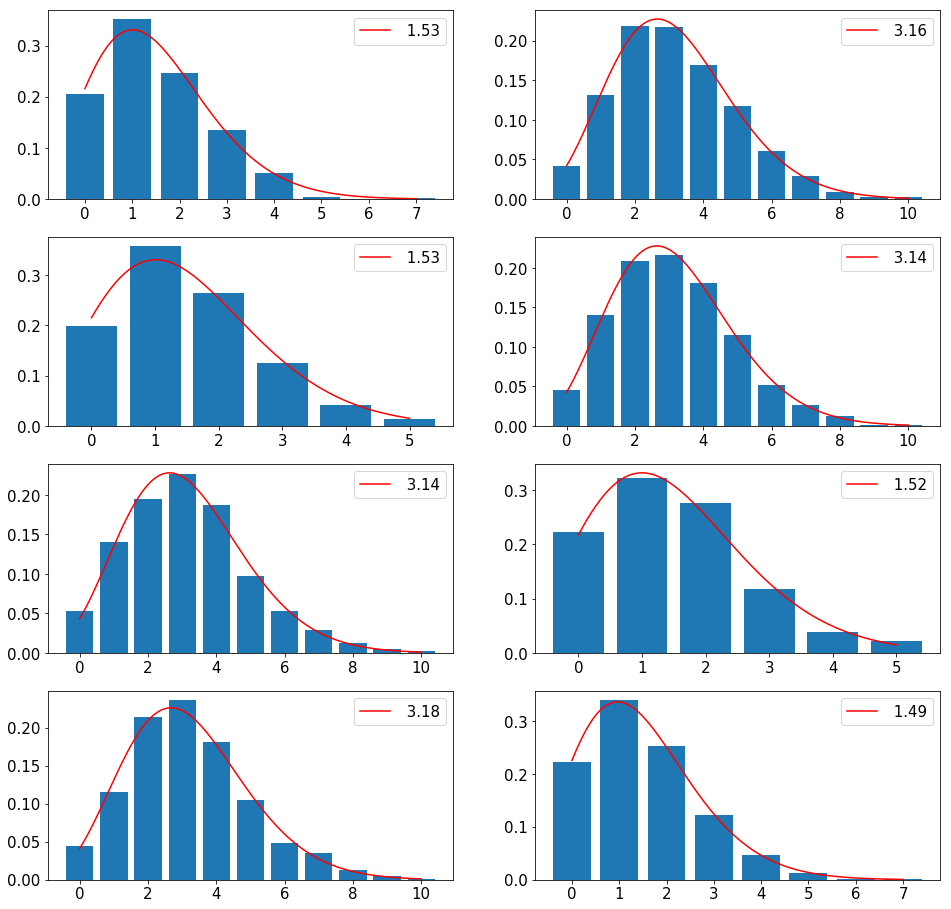

In [84]:
fig, axes = plt.subplots(4,2, figsize=(16,16))
axes = axes.flatten()

for i, ax in enumerate(axes):
    d = dom_hits[:,i]
    u, c = np.unique(d, return_counts=True)
    c = c.astype(float)
    c /= sum(c)
    popt, pcov = curve_fit(poisson, u, c)
    
    xmin, xmax = min(u), max(u)
    x = np.linspace(xmin, xmax, 1000)
    y = poisson(x, popt)
    
    ax.plot(x, y, color="r", zorder=3, label="%5.4s" % popt[0])
    ax.bar(u, c)
    ax.legend()

In [68]:
i = 0
d = dom_hits[:,i]
u, c = np.unique(d, return_counts=True)
c = c.astype(float)
c /= sum(c)
popt, pcov = curve_fit(poisson, u, c)
# c

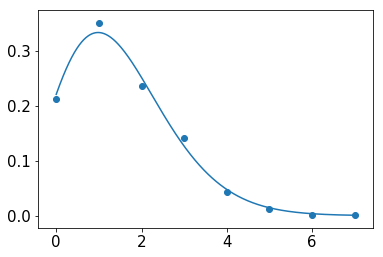

In [69]:
xmin, xmax = min(u), max(u)
x = np.linspace(xmin, xmax, 1000)
y = poisson(x, popt)
plt.plot(x, y)

plt.scatter(u, c)